In [1]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker # updated
import seaborn as sns
import numpy as np

# Load pre-processed data sets

In [2]:
movie_actor_df=pd.read_csv("GeneratedData\movies_actors.csv")

In [3]:
movie_actor_df.head()

,Title,Actor
0,Avatar,Sam Worthington
1,Avatar,Zoe Saldana
2,Avatar,Sigourney Weaver
3,Pirates of the Caribbean: At World's End,Johnny Depp
4,Pirates of the Caribbean: At World's End,Orlando Bloom


In [4]:
movies_money_df=pd.read_csv("GeneratedData\movies.csv")

In [5]:
movies_money_df.head()

,Budget,Revenue,Title,Average Vote,release_date,Release Year,"Revenue, USD mln","Budget, USD mln","Revenue Adjusted, USD mln",Revenue Adjusted,"Budget Adjusted, USD mln",Outlier,Starring Actors Popularity
0,92620000,650422,Metropolis,8.0,1927-01-10,1927.0,0.650422,92.62,9.301338,9.301338e+06,1324.509264,True,0.000000
1,380000000,1045713802,Pirates of the Caribbean: On Stranger Tides,6.4,2011-05-14,2011.0,1045.713802,380.00,1248.636967,1.248637e+09,453.739873,False,7103.622020
2,300000000,961000000,Pirates of the Caribbean: At World's End,6.9,2007-05-19,2007.0,961.000000,300.00,1291.503641,1.291504e+09,403.174914,False,4383.529869
3,270000000,391081192,Superman Returns,5.4,2006-06-28,2006.0,391.081192,270.00,541.347832,5.413478e+08,373.743145,False,1555.519755
4,200000000,1845034188,Titanic,7.5,1997-11-18,1997.0,1845.034188,200.00,3332.336975,3.332337e+09,361.222247,True,324.643821


# Numbers of movies relased through years 

The chart below shows total number of movies from the original (not cleaned) dataset. All unique entries except 4 candidates for duplicates.

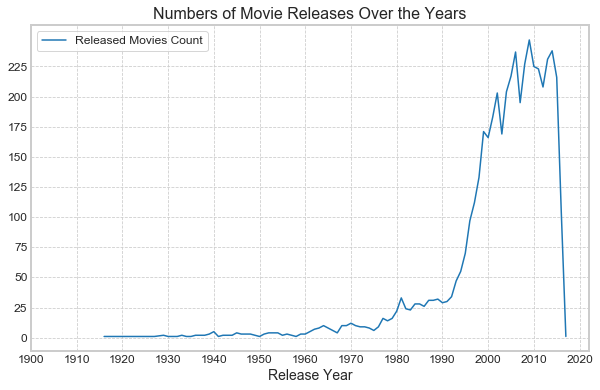

In [6]:
movies = pd.read_csv("Craig_portion/Resources/tmdb_5000_movies.csv")
movies_df = pd.DataFrame(movies)
movies_df['Release Year']=movies_df['release_date'].str[:4].astype(float)

movies_count_by_year=movies_df.groupby(by="Release Year")["title"].count().reset_index().rename(columns={"title":"Released Movies Count"})

sns.set_style(style='whitegrid',rc={'axes.linewidth': 2.0, 'legend.frameon': True, 'grid.linestyle': u'--',  'legend.scatterpoints': 1, 'font.size': 10, 'axes.labelsize': 'large', 'legend.fontsize': 10, 'axes.titlesize': 'large', 'xtick.labelsize': 12, 'ytick.labelsize': 10})
rc={'axes.labelsize': 14, 'font.size': 12, 'legend.fontsize': 12, 'axes.titlesize': 16}
plt.rcParams.update(**rc)
plt.figure(figsize=(10,6)) # updated
movies_count_by_year.plot(x="Release Year",y="Released Movies Count", ax = plt.gca()) # updated
plt.xticks(np.arange(1900,2021,10))
plt.yticks(np.arange(0,250,25))
plt.title("Numbers of Movie Releases Over the Years")# added
plt.savefig("OutputImages/Numbers of Movie Releases Over the Years.png",dpi=200) #added
plt.show()

In [7]:
sns.plotting_context()

{'axes.labelsize': 14.0,
 'axes.titlesize': 16.0,
 'font.size': 12.0,
 'grid.linewidth': 0.8,
 'legend.fontsize': 12.0,
 'lines.linewidth': 1.5,
 'lines.markeredgewidth': 1.0,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.labelsize': 'medium',
 'xtick.major.pad': 3.5,
 'xtick.major.width': 0.8,
 'xtick.minor.width': 0.6,
 'ytick.labelsize': 'medium',
 'ytick.major.pad': 3.5,
 'ytick.major.width': 0.8,
 'ytick.minor.width': 0.6}

# Buckets by Release Year

Because of large difference in numbers of movies released over the years, the movies are broken down into release year buckets.

In [8]:
#updated
year_buckets=[1960,1995]
movie_year_bucket=[]
movie_year_bucket_no=[]
year_buckets_labels=[]
for i in range(0,len(year_buckets)+1):
    if i==0:
        year_buckets_labels.append("before "+str(year_buckets[0]))
    elif i==len(year_buckets):
        year_buckets_labels.append("after "+str(year_buckets[-1]))
    else:
        year_buckets_labels.append(str(year_buckets[i-1])+" to "+str(year_buckets[i]))

for index,row in movies_money_df.iterrows():
    if row["Release Year"]<year_buckets[0]:
        movie_year_bucket.append(year_buckets_labels[0])
        movie_year_bucket_no.append(1)
    elif row["Release Year"]>=year_buckets[-1]:
        movie_year_bucket.append(year_buckets_labels[-1])
        movie_year_bucket_no.append(len(year_buckets)+1)
    else:
        ok=False
        for i in range(len(year_buckets)-1):
            if(year_buckets[i]<=row["Release Year"]<year_buckets[i+1]):
                movie_year_bucket.append(year_buckets_labels[i+1])
                movie_year_bucket_no.append(i+2)                
                ok=True
        if(ok==False):
            movie_year_bucket.append("undefined")
            movie_year_bucket_no.append(0)
       

movies_money_df["Years"]=movie_year_bucket
movies_money_df["Release Years Bucket"]=movie_year_bucket_no
year_buckets_labels

['before 1960', '1960 to 1995', 'after 1995']

# Buckets by Budget

Because of large difference in budgets, we break down movies into budget buckets. 

In [9]:
#modified, replace budget to budget
budget_buckets=[0.5,10,100] #updated
budget_bucket=[]
budget_bucket_no=[]
budget_buckets_labels=[]
units_str="USD mln"
for i in range(0,len(budget_buckets)+1):
    if i==0:
        budget_buckets_labels.append("<"+str(budget_buckets[0])+" "+units_str)
    elif i==len(budget_buckets):
        budget_buckets_labels.append(">"+str(budget_buckets[-1])+" "+units_str)
    else:
        budget_buckets_labels.append(str(budget_buckets[i-1])+"-"+str(budget_buckets[i])+" "+units_str)
        
for index,row in movies_money_df.iterrows():
    if row["Budget Adjusted, USD mln"]<budget_buckets[0]:
        budget_bucket.append(budget_buckets_labels[0])
        budget_bucket_no.append(1)
    elif row["Budget Adjusted, USD mln"]>=budget_buckets[-1]:
        budget_bucket.append(budget_buckets_labels[-1])
        budget_bucket_no.append(len(budget_buckets)+1)
    else:
        ok=False
        for i in range(len(budget_buckets)-1):#updated
            if(budget_buckets[i]<=row["Budget Adjusted, USD mln"]<budget_buckets[i+1]):
                budget_bucket.append(budget_buckets_labels[i+1])
                budget_bucket_no.append(i+2)
                ok=True
        if(ok==False):
            budget_bucket.append("undefined")
            budget_bucket_no.append(0)
            

movies_money_df["Budget Tier"]=budget_bucket
movies_money_df["Budget Tier No"]=budget_bucket_no
budget_buckets_labels

['<0.5 USD mln', '0.5-10 USD mln', '10-100 USD mln', '>100 USD mln']

# Revenues by release year and revenue tiers

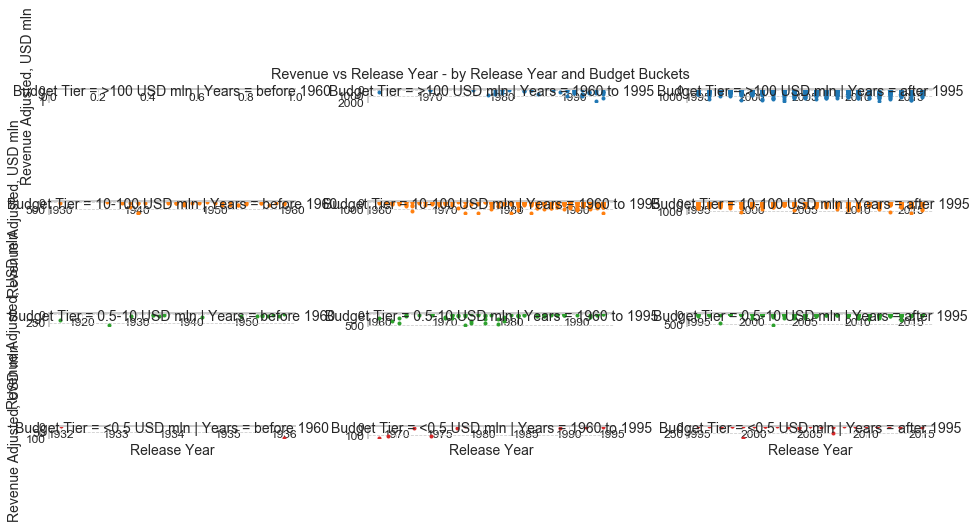

In [10]:
g = sns.FacetGrid(movies_money_df[~movies_money_df["Outlier"]], row="Budget Tier", row_order=list(reversed(budget_buckets_labels)), col="Years", col_order=year_buckets_labels, sharex=False, sharey=False, hue="Budget Tier", hue_order=list(reversed(budget_buckets_labels)), size=1.5,aspect=3) #updated
g = g.map(plt.scatter, 'Release Year', 'Revenue Adjusted, USD mln', marker='.')
plt.suptitle("Revenue vs Release Year - by Release Year and Budget Buckets")
plt.savefig("OutputImages/Revenue vs Release Year - by Release Year and Budget Buckets.png",dpi=300) #added
g.fig.subplots_adjust(top=.9)
plt.show()

# Analysis of Average Vote data

## Average Vote vs. Revenue

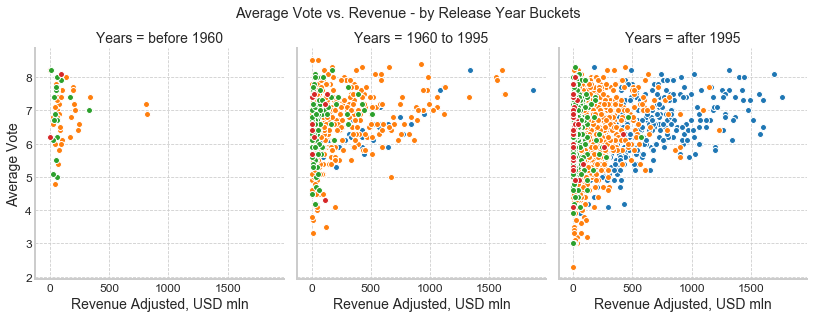

In [11]:
g = sns.FacetGrid(movies_money_df[(movies_money_df["Outlier"]==False) & (movies_money_df["Average Vote"]>0)], col="Years", col_order=year_buckets_labels, sharex=True, sharey=True, hue="Budget Tier", hue_order=list(reversed(budget_buckets_labels)),size=4.5,aspect=0.85) #updated
g = g.map(plt.scatter, 'Revenue Adjusted, USD mln', 'Average Vote', edgecolor="w", marker='o')#updated
plt.suptitle("Average Vote vs. Revenue - by Release Year Buckets")
g.fig.subplots_adjust(top=.85)
plt.savefig("OutputImages/Average Vote vs Revenue - by Release Year Buckets.png",dpi=300) #added
plt.show()

## Average Vote vs. Popularity of Starring Actors

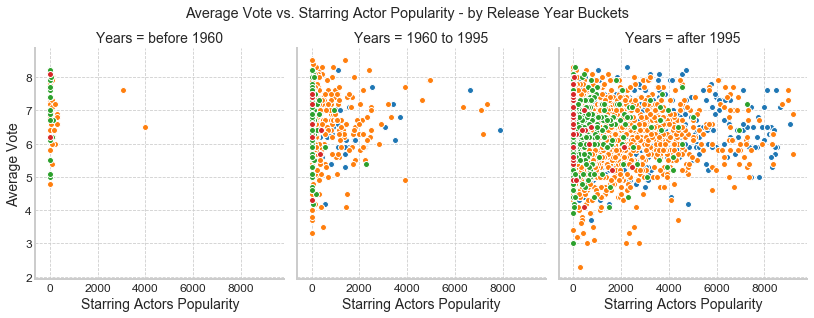

In [12]:
g = sns.FacetGrid(movies_money_df[(movies_money_df["Outlier"]==False) & (movies_money_df["Average Vote"]>0)], col="Years", col_order=year_buckets_labels, sharex=True, sharey=True, hue="Budget Tier", hue_order=list(reversed(budget_buckets_labels)),size=4.5,aspect=0.85)
g=g.map(plt.scatter, 'Starring Actors Popularity', 'Average Vote', edgecolor="w", marker='o')#updated
plt.suptitle("Average Vote vs. Starring Actor Popularity - by Release Year Buckets")
g.fig.subplots_adjust(top=.85)
plt.savefig("OutputImages/Average Vote vs Starring actor popularity - by Release Year Buckets.png",dpi=300) #added
plt.show()

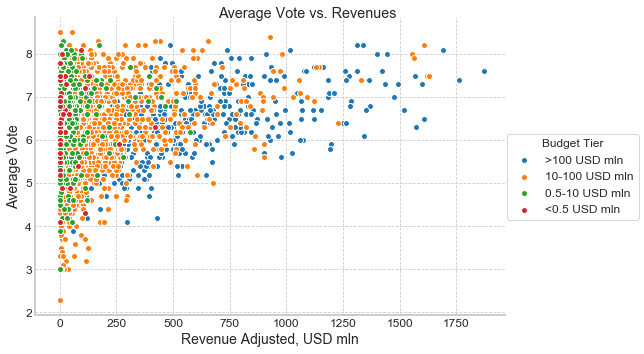

In [13]:
g = sns.pairplot(movies_money_df[(movies_money_df["Outlier"]==False) & (movies_money_df["Average Vote"]>0)], x_vars="Revenue Adjusted, USD mln", y_vars="Average Vote", hue="Budget Tier", hue_order=list(reversed(budget_buckets_labels)),size=5,aspect=1.5)
plt.suptitle("Average Vote vs. Revenues")
plt.savefig("OutputImages/Average Vote vs Revenues.png",dpi=300) #added
plt.show()

## Average vote - Conclusions

 - On the assumption that the vote data is authenic, the higher is either of the above factots considered, less likely the movie quality is estimated low
 - On the other hand, the estimate/vote does not necessarily increase with increase of any of the above considered factors
 - Revenue does not indicate the quality of a movie. Movies with low revenues are estimated as high as the movies with high revenues. Same for movie budgets.
 

# Analysis of Impact of Starring Actor Popularity Factor

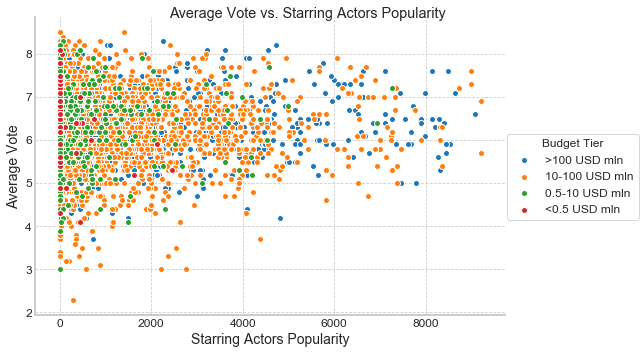

In [14]:
g = sns.pairplot(movies_money_df[(movies_money_df["Outlier"]==False) & (movies_money_df["Average Vote"]>0)], x_vars="Starring Actors Popularity", y_vars="Average Vote", hue="Budget Tier", hue_order=list(reversed(budget_buckets_labels)),size=5,aspect=1.5)
plt.suptitle("Average Vote vs. Starring Actors Popularity")
plt.savefig("OutputImages/Average Vote vs Starring actor popularity.png",dpi=300) #added
plt.show()

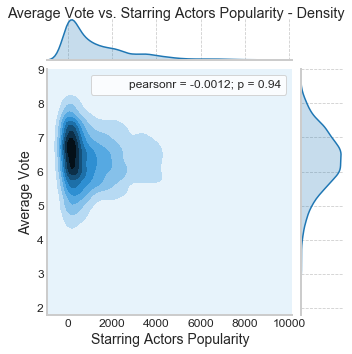

In [15]:
g = sns.jointplot(data=movies_money_df[(movies_money_df["Outlier"]==False) & (movies_money_df["Average Vote"]>0)], kind="kde",x="Starring Actors Popularity", y="Average Vote", size=5)
plt.suptitle("Average Vote vs. Starring Actors Popularity - Density")
g.fig.subplots_adjust(top=.95)
plt.savefig("OutputImages/Average Vote vs Starring actor popularity - density.png",dpi=300) #added
plt.show()

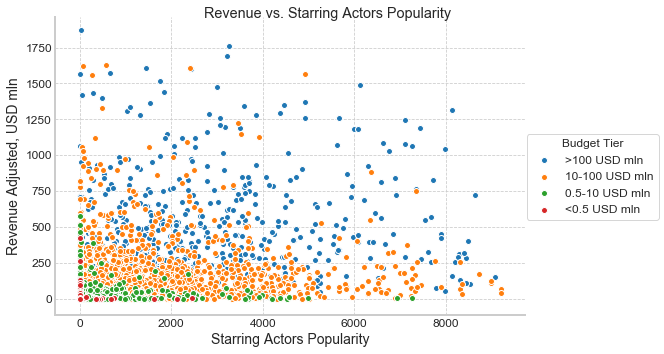

In [16]:
g = sns.pairplot(movies_money_df[~movies_money_df["Outlier"]], x_vars="Starring Actors Popularity", y_vars="Revenue Adjusted, USD mln", hue="Budget Tier", hue_order=list(reversed(budget_buckets_labels)),size=5,aspect=1.5)
plt.suptitle("Revenue vs. Starring Actors Popularity")
plt.savefig("OutputImages/Revenue vs Starring actor popularity.png",dpi=300) #added
plt.show()

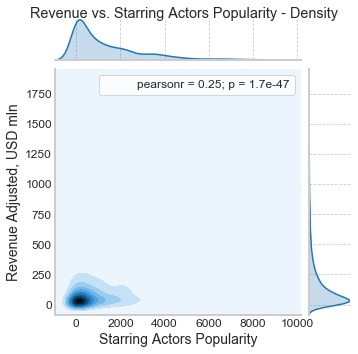

In [17]:
g = sns.jointplot(data=movies_money_df[movies_money_df["Outlier"]==False], kind="kde",x="Starring Actors Popularity", y="Revenue Adjusted, USD mln", size=5)
plt.suptitle("Revenue vs. Starring Actors Popularity - Density")
g.fig.subplots_adjust(top=.95)
plt.savefig("OutputImages/Revenue vs Starring actor popularity - density.png",dpi=300) #added
plt.show()

## Impact of Starring Actor Popularity Factor - Conclusions

 - Although the popularity af starring actors has a weak impact of revenues, it is not a determining factor.

# Analysis of impact of Movie Budget on Revenue and Avg Vote

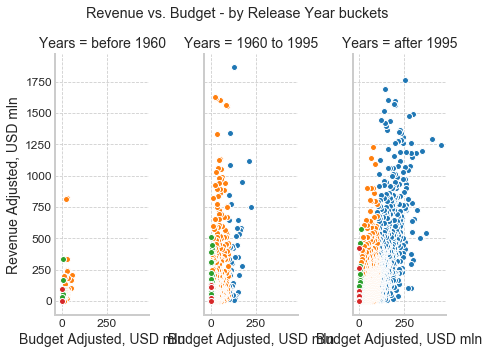

In [25]:
#added
#movies_money_df.sort_values(["Release Years Bucket"],ascending=[True],inplace=True)
max_budget=movies_money_df[movies_money_df["Outlier"]==False]["Budget Adjusted, USD mln"].values.max()
g = sns.FacetGrid(movies_money_df[movies_money_df["Outlier"]==False], col="Years", col_order=year_buckets_labels, hue="Budget Tier", hue_order=list(reversed(budget_buckets_labels)), sharex=True, sharey=True, size=5,aspect=0.45) 
g = g.map(plt.scatter,  'Budget Adjusted, USD mln', 'Revenue Adjusted, USD mln',edgecolor="w",  marker='o')
plt.suptitle("Revenue vs. Budget - by Release Year buckets")
g.fig.subplots_adjust(top=.85)
plt.savefig("OutputImages/Revenue vs Budget - by Release Year buckets.png",dpi=300) #added
plt.show()

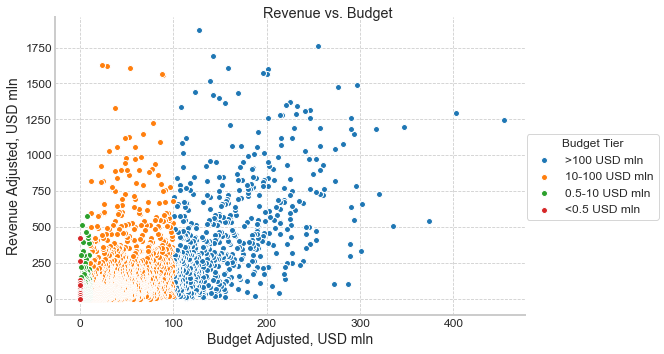

In [19]:
g = sns.pairplot(movies_money_df[~movies_money_df["Outlier"]], x_vars="Budget Adjusted, USD mln", y_vars="Revenue Adjusted, USD mln", hue="Budget Tier", hue_order=list(reversed(budget_buckets_labels)),size=5,aspect=1.5)
plt.suptitle("Revenue vs. Budget")
plt.savefig("OutputImages/Revenue vs Budget.png",dpi=300) #added
plt.show()

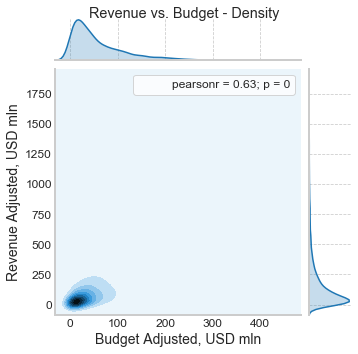

In [20]:
g = sns.jointplot(data=movies_money_df[movies_money_df["Outlier"]==False], kind="kde",x="Budget Adjusted, USD mln", y="Revenue Adjusted, USD mln", size=5)
plt.suptitle("Revenue vs. Budget - Density")
g.fig.subplots_adjust(top=.95)
plt.savefig("OutputImages/Revenue vs Budget - density.png",dpi=300) #added
plt.show()

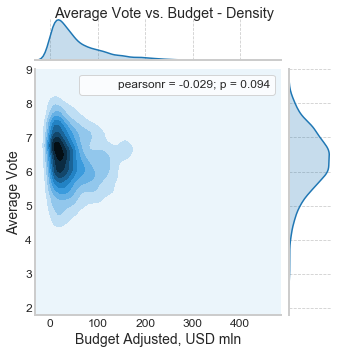

In [21]:
g = sns.jointplot(data=movies_money_df[(movies_money_df["Outlier"]==False) & (movies_money_df["Average Vote"]>0)], kind="kde",x="Budget Adjusted, USD mln", y="Average Vote", size=5)
plt.suptitle("Average Vote vs. Budget - Density")
g.fig.subplots_adjust(top=.95)
plt.savefig("OutputImages/Average Vote vs Budget - density.png",dpi=300) #added
plt.show()

## Average Vote vs. Budget

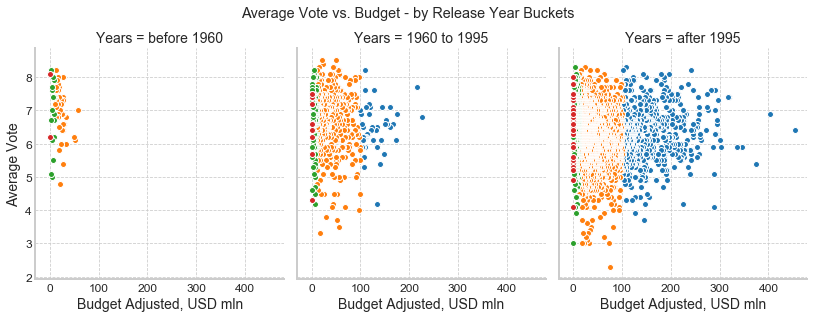

In [22]:
g = sns.FacetGrid(movies_money_df[(movies_money_df["Outlier"]==False) & (movies_money_df["Average Vote"]>0)], col="Years", col_order=year_buckets_labels, sharex=True, sharey=True, hue="Budget Tier", hue_order=list(reversed(budget_buckets_labels)), size=4.5,aspect=0.85) #updated
g = g.map(plt.scatter, 'Budget Adjusted, USD mln', 'Average Vote', edgecolor="w", marker='o')#updated
plt.suptitle("Average Vote vs. Budget - by Release Year Buckets")
g.fig.subplots_adjust(top=.85)
plt.savefig("OutputImages/Average Vote vs Budget - by Release Year Buckets.png",dpi=300) #added
plt.show()

## Impact of Movie Budget on Revenue and Avg Vote  - conclusions

- Film revenues do have considerable linear dependency on budgets, although the variance is high.